In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import time
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor, BaggingRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.svm import LinearSVR
from sklearn.model_selection import cross_val_score, KFold
from sklearn.exceptions import ConvergenceWarning, DataConversionWarning


In [2]:
warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore", category=DataConversionWarning)

In [3]:
data = pd.read_csv('./data/cleaned_car_data.csv')

In [4]:
data.sample()

,Unnamed: 0,milage,accident,price,horsepower,brand_alfa,brand_aston,brand_audi,brand_bentley,brand_bmw,...,brand_toyota,brand_volkswagen,brand_volvo,fuel_type_e85 flex fuel,fuel_type_electric,fuel_type_gasoline,fuel_type_hybrid,fuel_type_hydrogen,fuel_type_plug-in hybrid,transmission_category_manual
1935,1936,0.746166,0.0,8500.0,-1.273673,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False


In [5]:
features = data.drop(["price"], axis=1)
target = data[["price"]]

In [6]:
X = features.values
y = target.values

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
scoring = {
    'MAE': 'neg_mean_absolute_error',
    'MSE': 'neg_mean_squared_error',
    'MedAE': 'neg_median_absolute_error'
}

In [9]:
modelNames = ['Regresja Liniowa', 'Drzewo decyzyjne', 'Drzewo decyzyjne(3,5)', 'Drzewa decyzyjne(5,10)',
              'Las losowy', 'Las losowy(100,10)', 'Las losowy(30,none)', 'Regresja Ridge', 'Regresja Lasso',
              'SVM', 'SVM(linear, 0.1)', 'SVM(rbf, 2.0, scale)', 'Gradient Boosting Regressor',
              'Gradient Boosting Regressor(100,0.01)', 'Gradient Boosting Regressor(200,0.1)',
              'AdaBoost', 'AdaBoost(50, 1.0)', 'AdaBoost(100, 0.5)', 'Bagging(50)', 'Bagging(10)', 'Bagging(150)',
              'Stacking(lr+svr+rf)', 'Stacking(rf+svr)', 'Stacking(gb+dt)', 'Stacking(rf+br)']


In [10]:
models = {
    modelNames[0]: LinearRegression(),
    modelNames[1]: DecisionTreeRegressor(random_state=42),
    modelNames[2]: DecisionTreeRegressor(max_depth=3, min_samples_leaf=5),
    modelNames[3]: DecisionTreeRegressor(max_depth=5, min_samples_split=10),
    modelNames[4]: RandomForestRegressor(random_state=42),
    modelNames[5]: RandomForestRegressor(n_estimators=100, max_depth=10),
    modelNames[6]: RandomForestRegressor(n_estimators=50, max_depth=None),
    modelNames[7]: Ridge(),
    modelNames[8]: Lasso(),
    modelNames[9]: LinearSVR(random_state=42, dual='auto', max_iter=10000),
    modelNames[10]: LinearSVR(random_state=42, dual='auto', max_iter=10000, C=0.1),
    modelNames[11]: SVR(kernel='rbf', C=2.0, gamma='scale'),
    modelNames[12]: GradientBoostingRegressor(random_state=42),
    modelNames[13]: GradientBoostingRegressor(n_estimators=100, learning_rate=0.01),
    modelNames[14]: GradientBoostingRegressor(n_estimators=200, learning_rate=0.1),
    modelNames[15]: AdaBoostRegressor(random_state=42, n_estimators=50),
    modelNames[16]: AdaBoostRegressor(n_estimators=50, learning_rate=1.0),
    modelNames[17]: AdaBoostRegressor(n_estimators=100, learning_rate=0.5),
    modelNames[18]: BaggingRegressor(random_state=42, n_estimators=50),
    modelNames[19]: BaggingRegressor(n_estimators=10),
    modelNames[20]: BaggingRegressor(n_estimators=150),
    modelNames[21]: StackingRegressor(estimators=[
                                                     ('lr', LinearRegression()),
                                                     ('svr', LinearSVR(random_state=42, dual='auto')),
                                                     ('rf', RandomForestRegressor(random_state=42))
                                                 ], final_estimator=Ridge()),
    modelNames[22]: StackingRegressor(estimators=[
                                                     ('rf', RandomForestRegressor(n_estimators=10)),
                                                     ('svr', LinearSVR(random_state=42, dual='auto'))
                                                 ], final_estimator=Ridge()),
    modelNames[23]: StackingRegressor(estimators=[
                                                     ('gb', GradientBoostingRegressor(n_estimators=50)),
                                                     ('dt', DecisionTreeRegressor(max_depth=5))
                                                 ], final_estimator=Ridge()),
    modelNames[24]: StackingRegressor(estimators=[
                                                     ('rf', RandomForestRegressor(random_state=42)),
                                                     ('br', BaggingRegressor(n_estimators=150))
                                                 ], final_estimator=Ridge())
}

In [11]:
results = {}
normResultsMAE=[]
normResultsMSE=[]
normResultsMedAE=[]
timeResults=[]

for index, element in enumerate(modelNames):
    start_time = time.time()
    results[element] = cross_validate(models[element], X, y, cv=kf, scoring=scoring, return_train_score=False)
    end_time = time.time()
    timeResults.append(end_time - start_time)
    normResultsMAE.append(-np.mean(results[element]['test_MAE']))
    normResultsMSE.append(-np.mean(results[element]['test_MSE']))
    normResultsMedAE.append(-np.mean(results[element]['test_MedAE']))
    print(f"{element}: {normResultsMAE[-1]:.2f}, {normResultsMSE[-1]:.2f}, {normResultsMedAE[-1]:.2f}, {timeResults[-1]:.2f}")

Regresja Liniowa: 17872.32, 3754535899.04, 9883.70, 0.40
Drzewo decyzyjne: 17033.01, 4840123081.27, 7712.30, 0.29
Drzewo decyzyjne(3,5): 20723.06, 4439781165.39, 10044.09, 0.08
Drzewa decyzyjne(5,10): 18221.58, 4264184023.96, 7952.27, 0.09
Las losowy: 13340.30, 3455519231.82, 6115.01, 7.88
Las losowy(100,10): 14102.59, 3554402138.61, 6603.75, 4.39
Las losowy(30,none): 13324.69, 3451237546.73, 6048.48, 3.94
Regresja Ridge: 18009.39, 3750130558.41, 10073.84, 0.50
Regresja Lasso: 17860.84, 3754319749.39, 9843.18, 1.54
SVM: 30101.02, 5836785660.43, 17378.50, 1.39
SVM(linear, 0.1): 31424.93, 5974252866.90, 18575.93, 0.42
SVM(rbf, 2.0, scale): 26577.97, 5457079171.81, 15405.42, 3.28
Gradient Boosting Regressor: 15159.60, 4079310820.53, 7181.70, 2.44
Gradient Boosting Regressor(100,0.01): 19790.88, 4029488584.01, 13311.50, 2.36
Gradient Boosting Regressor(200,0.1): 14821.09, 4261820373.35, 6625.69, 4.75
AdaBoost: 56315.32, 7730194131.23, 54096.65, 4.54
AdaBoost(50, 1.0): 47866.73, 5972821386.

In [12]:
resultsMAE = pd.DataFrame({'Model': modelNames,'MAE': normResultsMAE})
resultsMSE = pd.DataFrame({'Model': modelNames, 'MSE': normResultsMSE})
resultsMedAE = pd.DataFrame({'Model': modelNames,'MedAE': normResultsMedAE})
resultsTime = pd.DataFrame({'Model': modelNames,'Time': timeResults})

print(resultsMAE.sort_values(by='MAE'),end="\n\n")
print(resultsMSE.sort_values(by='MSE'),end="\n\n")
print(resultsMedAE.sort_values(by='MedAE'),end="\n\n")
print(resultsTime.sort_values(by='Time'),end="\n\n")

                                    Model           MAE
20                           Bagging(150)  13266.388643
6                     Las losowy(30,none)  13324.692906
4                              Las losowy  13340.304734
18                            Bagging(50)  13527.653159
19                            Bagging(10)  13764.933865
24                        Stacking(rf+br)  13888.178870
5                      Las losowy(100,10)  14102.585932
21                    Stacking(lr+svr+rf)  14188.104302
14   Gradient Boosting Regressor(200,0.1)  14821.094523
12            Gradient Boosting Regressor  15159.600071
22                       Stacking(rf+svr)  15514.192760
23                        Stacking(gb+dt)  16902.854195
1                        Drzewo decyzyjne  17033.009578
8                          Regresja Lasso  17860.843747
0                        Regresja Liniowa  17872.324556
7                          Regresja Ridge  18009.390430
3                  Drzewa decyzyjne(5,10)  18221

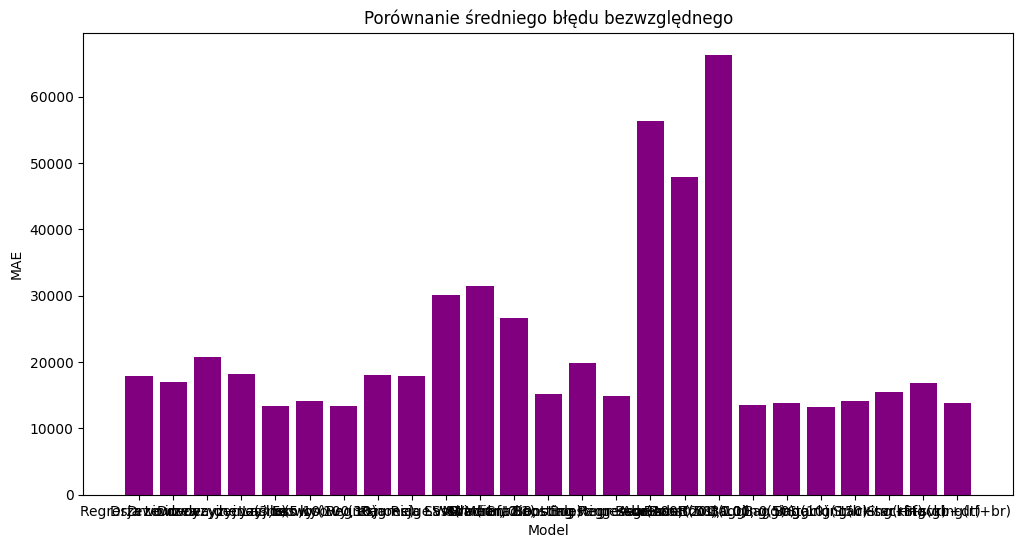

In [14]:
plt.figure(figsize=(12, 6))
plt.bar(resultsMAE['Model'], resultsMAE['MAE'], color='purple')
plt.xlabel('Model')
plt.ylabel('MAE')
plt.title('Porównanie średniego błędu bezwzględnego')
plt.show()

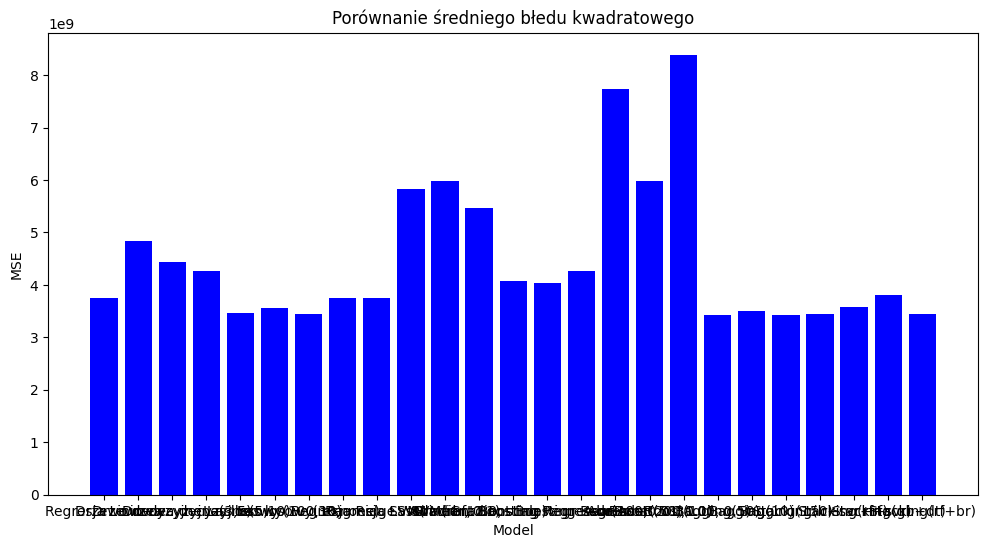

In [15]:
plt.figure(figsize=(12, 6))
plt.bar(resultsMSE['Model'], resultsMSE['MSE'], color='blue')
plt.xlabel('Model')
plt.ylabel('MSE')
plt.title('Porównanie średniego błedu kwadratowego')
plt.show()



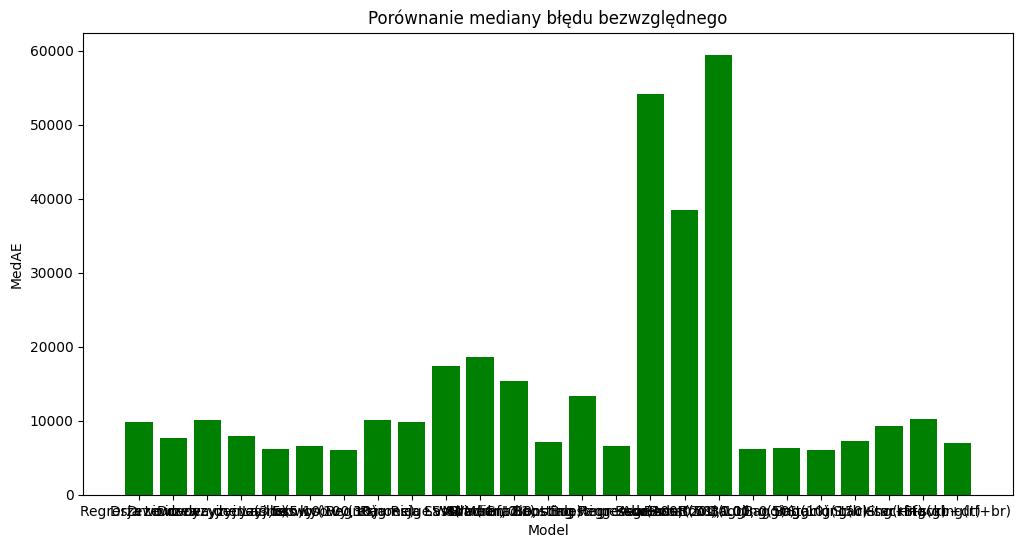

In [16]:
plt.figure(figsize=(12, 6))
plt.bar(resultsMedAE['Model'], resultsMedAE['MedAE'], color='green')
plt.xlabel('Model')
plt.ylabel('MedAE')
plt.title('Porównanie mediany błędu bezwzględnego')
plt.show()



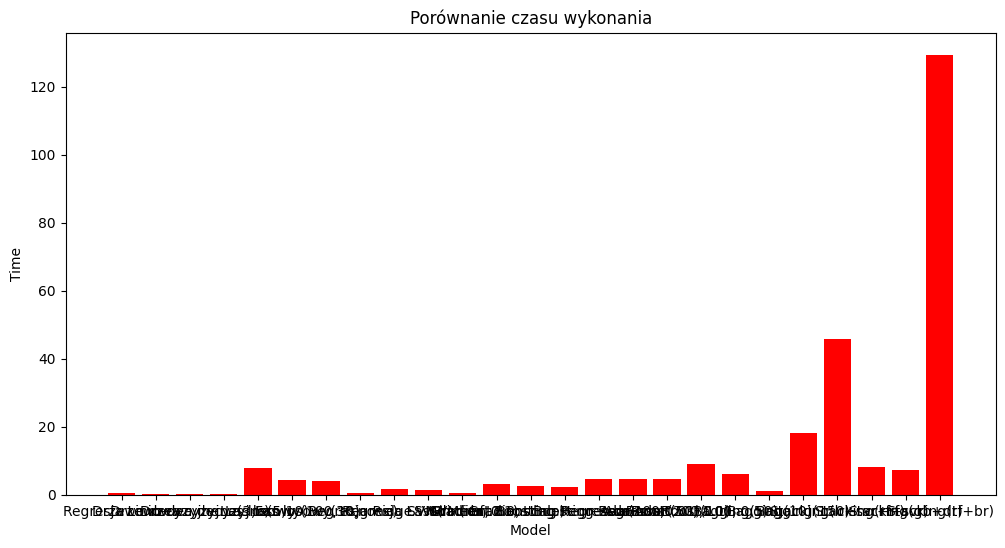

In [17]:
plt.figure(figsize=(12, 6))
plt.bar(resultsTime['Model'], resultsTime['Time'], color='red')
plt.xlabel('Model')
plt.ylabel('Time')
plt.title('Porównanie czasu wykonania')
plt.show()